In [52]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from bs4 import BeautifulSoup as soup
import requests
import pandas as pd
import re
import seaborn as sns

In [134]:
url = requests.get("https://www.worldometers.info/coronavirus/").text
html_source = re.sub(r'<.*?>', lambda g: g.group(0).upper(), url)

df = pd.read_html(html_source)
df[0]

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,NaN,North America,8574558,"+6,057",304528.0,524.0,5429132.0,"+5,142",2840898.0,17749.0,NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN
1,NaN,Asia,9942248,"+6,274",184258.0,17.0,8238070.0,"+7,557",1519920.0,20572.0,NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN
2,NaN,South America,7759266,+628,244567.0,34.0,6598969.0,+545,915730.0,15742.0,NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN
3,NaN,Europe,4667848,"+5,446",218781.0,76.0,2448851.0,"+1,719",2000216.0,7790.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN
4,NaN,Africa,1444619,NaN,34758.0,NaN,1190410.0,NaN,219451.0,1455.0,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,NaN,Total:,4667848,"+5,446",218781.0,76.0,2448851.0,"+1,719",2000216.0,7790.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN
227,NaN,Total:,1444619,NaN,34758.0,NaN,1190410.0,NaN,219451.0,1455.0,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN
228,NaN,Total:,30887,+19,908.0,8.0,28015.0,+23,1964.0,19.0,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN
229,NaN,Total:,721,NaN,15.0,NaN,651.0,NaN,55.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
data = df[0]
data.drop([data.columns[0]], axis=1, inplace=True)
data.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,North America,8574558,"+6,057",304528.0,524.0,5429132.0,"+5,142",2840898.0,17749.0,NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN
1,Asia,9942248,"+6,274",184258.0,17.0,8238070.0,"+7,557",1519920.0,20572.0,NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN
2,South America,7759266,+628,244567.0,34.0,6598969.0,+545,915730.0,15742.0,NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN
3,Europe,4667848,"+5,446",218781.0,76.0,2448851.0,"+1,719",2000216.0,7790.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN
4,Africa,1444619,NaN,34758.0,NaN,1190410.0,NaN,219451.0,1455.0,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN


In [136]:
data = data[:223]
data

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,North America,8574558,"+6,057",304528.0,524.0,5429132.0,"+5,142",2840898.0,17749.0,NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN
1,Asia,9942248,"+6,274",184258.0,17.0,8238070.0,"+7,557",1519920.0,20572.0,NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN
2,South America,7759266,+628,244567.0,34.0,6598969.0,+545,915730.0,15742.0,NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN
3,Europe,4667848,"+5,446",218781.0,76.0,2448851.0,"+1,719",2000216.0,7790.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN
4,Africa,1444619,NaN,34758.0,NaN,1190410.0,NaN,219451.0,1455.0,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Vatican City,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,8.010000e+02,Europe,67.0,NaN,NaN
219,Western Sahara,10,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,6.006540e+05,Africa,60065.0,600654.0,NaN
220,MS Zaandam,9,NaN,2.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,Anguilla,3,NaN,NaN,NaN,3.0,NaN,0.0,NaN,200.0,NaN,1020.0,67846.0,1.503400e+04,North America,5011.0,NaN,15.0


In [137]:
data.dtypes

Country,Other          object
TotalCases              int64
NewCases               object
TotalDeaths           float64
NewDeaths             float64
TotalRecovered        float64
NewRecovered           object
ActiveCases           float64
Serious,Critical      float64
Tot Cases/1M pop      float64
Deaths/1M pop         float64
TotalTests            float64
Tests/ 1M pop         float64
Population            float64
Continent              object
1 Caseevery X ppl     float64
1 Deathevery X ppl    float64
1 Testevery X ppl     float64
dtype: object

In [153]:
cols_to_replace = ["NewCases", "NewDeaths", "NewRecovered"]

for col in cols_to_replace:
    try:
        data[col] = data[col].str.replace("+", "", regex=False)
        data[col] = data[col].str.replace(",", "", regex=False).astype(float)
    except:
        next

R:\Work\Anacond\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
R:\Work\Anacond\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [154]:
data.dtypes

Country,Other          object
TotalCases              int64
NewCases              float64
TotalDeaths           float64
NewDeaths             float64
TotalRecovered        float64
NewRecovered          float64
ActiveCases           float64
Serious,Critical      float64
Tot Cases/1M pop      float64
Deaths/1M pop         float64
TotalTests            float64
Tests/ 1M pop         float64
Population            float64
Continent              object
1 Caseevery X ppl     float64
1 Deathevery X ppl    float64
1 Testevery X ppl     float64
dtype: object

In [155]:
data

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,North America,8574558,6057.0,304528.0,524.0,5429132.0,5142.0,2840898.0,17749.0,NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN
1,Asia,9942248,6274.0,184258.0,17.0,8238070.0,7557.0,1519920.0,20572.0,NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN
2,South America,7759266,628.0,244567.0,34.0,6598969.0,545.0,915730.0,15742.0,NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN
3,Europe,4667848,5446.0,218781.0,76.0,2448851.0,1719.0,2000216.0,7790.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN
4,Africa,1444619,NaN,34758.0,NaN,1190410.0,NaN,219451.0,1455.0,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Vatican City,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,8.010000e+02,Europe,67.0,NaN,NaN
219,Western Sahara,10,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,6.006540e+05,Africa,60065.0,600654.0,NaN
220,MS Zaandam,9,NaN,2.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,Anguilla,3,NaN,NaN,NaN,3.0,NaN,0.0,NaN,200.0,NaN,1020.0,67846.0,1.503400e+04,North America,5011.0,NaN,15.0


In [156]:
data[data.Population > 0]

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
8,USA,7185516,45.0,207538.0,NaN,4437575.0,NaN,2540403.0,14156.0,21679.0,626.0,101576599.0,306454.0,3.314575e+08,North America,46.0,1597.0,3.0
9,India,5818570,2467.0,92317.0,NaN,4756164.0,3173.0,970089.0,8944.0,4207.0,67.0,68928440.0,49834.0,1.383160e+09,Asia,238.0,14983.0,20.0
10,Brazil,4659909,NaN,139883.0,NaN,4023789.0,NaN,496237.0,8318.0,21886.0,657.0,17900000.0,84072.0,2.129127e+08,South America,46.0,1522.0,12.0
11,Russia,1128836,NaN,19948.0,NaN,929829.0,NaN,179059.0,2300.0,7734.0,137.0,43900000.0,300789.0,1.459493e+08,Europe,129.0,7316.0,3.0
12,Colombia,790823,NaN,24924.0,NaN,674961.0,NaN,90938.0,863.0,15504.0,489.0,3534650.0,69295.0,5.100883e+07,South America,65.0,2047.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Falkland Islands,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3711.0,NaN,2261.0,645447.0,3.503000e+03,South America,269.0,NaN,2.0
218,Vatican City,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,8.010000e+02,Europe,67.0,NaN,NaN
219,Western Sahara,10,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,6.006540e+05,Africa,60065.0,600654.0,NaN
221,Anguilla,3,NaN,NaN,NaN,3.0,NaN,0.0,NaN,200.0,NaN,1020.0,67846.0,1.503400e+04,North America,5011.0,NaN,15.0


In [157]:
data.sum().to_frame().style.format("{:.0f}")

,0
TotalCases,97260441
NewCases,55272
TotalDeaths,2963445
NewDeaths,1977
TotalRecovered,71582412
NewRecovered,44958
ActiveCases,21485792
"Serious,Critical",189993
Tot Cases/1M pop,1120558
Deaths/1M pop,25018


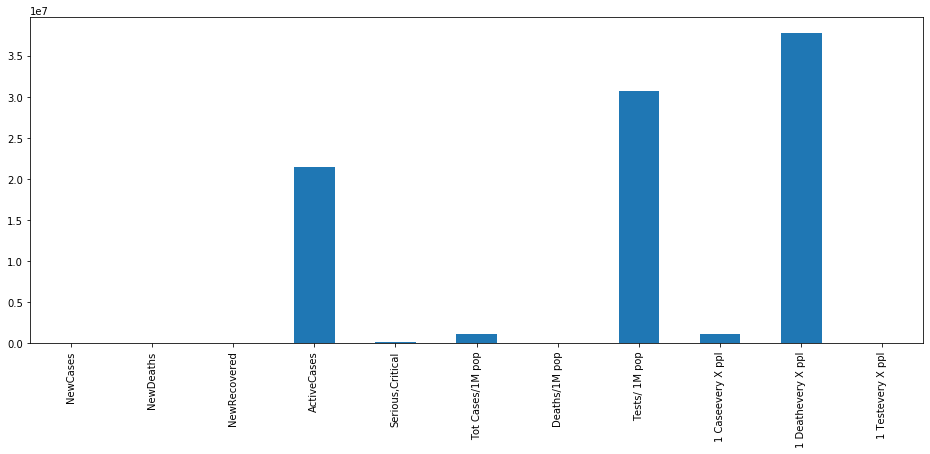

In [158]:
data_to_drop = ["TotalCases", "TotalRecovered", "TotalDeaths", "TotalTests","Population"]
data.drop(data_to_drop, axis=1).sum().plot(kind="bar", figsize=(16, 6))

In [170]:
with open("countries.txt", "r") as f:
    countries_list = f.read()
countries_list.split("\n")[:-1]

['Oceania',
 'World',
 'USA',
 'India',
 'Brazil',
 'Russia',
 'Colombia',
 'Peru',
 'Mexico',
 'Spain',
 'Argentina',
 'South Africa',
 'France',
 'Chile',
 'Iran',
 'UK',
 'Bangladesh',
 'Iraq',
 'Saudi Arabia',
 'Turkey',
 'Pakistan',
 'Italy',
 'Philippines',
 'Germany',
 'Indonesia',
 'Israel',
 'Ukraine',
 'Canada',
 'Bolivia',
 'Ecuador',
 'Qatar',
 'Romania',
 'Dominican Republic',
 'Morocco',
 'Belgium',
 'Panama',
 'Kazakhstan',
 'Netherlands',
 'Egypt',
 'Kuwait',
 'Oman',
 'Sweden',
 'UAE',
 'Guatemala',
 'Poland',
 'Japan',
 'Belarus',
 'Honduras',
 'Ethiopia',
 'Portugal',
 'Venezuela',
 'Costa Rica',
 'Nepal',
 'Bahrain',
 'Czechia',
 'Nigeria',
 'Singapore',
 'Uzbekistan',
 'Switzerland',
 'Algeria',
 'Moldova',
 'Armenia',
 'Ghana',
 'Kyrgyzstan',
 'Austria',
 'Azerbaijan',
 'Afghanistan',
 'Palestine',
 'Kenya',
 'Paraguay',
 'Ireland',
 'Serbia',
 'Lebanon',
 'Libya',
 'El Salvador',
 'Australia',
 'Bosnia and Herzegovina',
 'Denmark',
 'S. Korea',
 'Hungary',
 'Came

In [164]:
data.sum().groupby(["Continent"])

KeyError: 'Continent'

In [151]:
continents = set([d for d in data["Continent"] if type(d) == str])
continents

{'Africa',
 'All',
 'Asia',
 'Australia/Oceania',
 'Europe',
 'North America',
 'South America'}

In [152]:
countries = list([ d for d in data["Country,Other"] if type(d) == str and d not in continents])
countries

['Oceania',
 'World',
 'USA',
 'India',
 'Brazil',
 'Russia',
 'Colombia',
 'Peru',
 'Mexico',
 'Spain',
 'Argentina',
 'South Africa',
 'France',
 'Chile',
 'Iran',
 'UK',
 'Bangladesh',
 'Iraq',
 'Saudi Arabia',
 'Turkey',
 'Pakistan',
 'Italy',
 'Philippines',
 'Germany',
 'Indonesia',
 'Israel',
 'Ukraine',
 'Canada',
 'Bolivia',
 'Ecuador',
 'Qatar',
 'Romania',
 'Dominican Republic',
 'Morocco',
 'Belgium',
 'Panama',
 'Kazakhstan',
 'Netherlands',
 'Egypt',
 'Kuwait',
 'Oman',
 'Sweden',
 'UAE',
 'Guatemala',
 'Poland',
 'Japan',
 'Belarus',
 'Honduras',
 'Ethiopia',
 'Portugal',
 'Venezuela',
 'Costa Rica',
 'Nepal',
 'Bahrain',
 'Czechia',
 'Nigeria',
 'Singapore',
 'Uzbekistan',
 'Switzerland',
 'Algeria',
 'Moldova',
 'Armenia',
 'Ghana',
 'Kyrgyzstan',
 'Austria',
 'Azerbaijan',
 'Afghanistan',
 'Palestine',
 'Kenya',
 'Paraguay',
 'Ireland',
 'Serbia',
 'Lebanon',
 'Libya',
 'El Salvador',
 'Australia',
 'Bosnia and Herzegovina',
 'Denmark',
 'S. Korea',
 'Hungary',
 'Came

In [168]:
with open("countries.txt", "w") as f:
    for country in countries:
        f.write(country + "\n")